In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import*
import random 

In [ ]:
#HOMEWORK:
#0,1,0,0,0,1,1
#ex.1 fitness is the sum of these things instead of a fitness landscape 
#i.e. string full of 1s is the  best solution 
#when n is large can you get to 100% 1s
#how long can genomes become? 

In [12]:
def makePopulation(N,popsize):
    population=list()
    for p in range (popsize):
        genome=list()
        for n in range(N):
            genome.append(random.randint(0,1))
        population.append(genome)
    return population

print makePopulation(5,10)

[[1, 1, 1, 0, 1], [1, 1, 0, 0, 1], [0, 1, 0, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 1, 1, 0, 0], [1, 0, 1, 0, 1], [1, 1, 0, 0, 0], [0, 0, 0, 0, 1]]


In [13]:
def computeFitness(genome):
    return sum(genome)
        

#so this function basically uses the double or triple digit combo 
#and the genome spot (n column index) to find the fitness value
#by converting the series of 0s and 1s into a single digit binary number
#that will refer to the single digit index within the column 
#then you take all the 4 fitnesses and multiple them and the root of them

computeFitness([1,1,1,1])

4

In [14]:
def makeMutant(genome, mutationRate):
    newGenome=list()
    for i in range(len(genome)):
        if random.uniform(0.0,1.0)<mutationRate:
            newGenome.append(1-genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

In [70]:
def findfitness (N, popSize,generations, mutationRate):

    population=makePopulation(N,popSize)
    meanW=list()
    maxW=list()

    for generation in range(generations):
        W=list()
        for i in range(len(population)):
            W.append(computeFitness(population[i]))

        nextGeneration=list()
        meanW.append(mean(W))
        highestFitness=max(W)
        maxW.append(highestFitness)
   
        while len(nextGeneration)<popSize: 
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
                who=random.randint(0,popSize-1)
        #nextGeneration.append(population[who])
            nextGeneration.append(makeMutant(population[who],mutationRate))
        population=list(nextGeneration)
    plotinfo = [maxW,meanW]  
    return plotinfo #plot info 0 is the maxW an organism in that generation achieved
    
test=findfitness(2,popSize,100,mutationRate)
print test
print int(test[0][99])
print int(round(test[1][99]))

mean(test[0])

[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1.1499999999999999, 1.98, 1.99, 1.99, 1.98, 1.99, 1.9399999999999999, 1.99, 1.96, 1.98, 1.97, 1.98, 1.99, 1.95, 1.98, 1.99, 2.0, 1.99, 1.98, 1.98, 1.99, 1.97, 1.96, 1.96, 1.97, 1.99, 1.99, 1.99, 1.96, 1.98, 2.0, 1.98, 1.97, 1.96, 1.97, 1.98, 1.99, 2.0, 1.98, 1.95, 1.98, 1.96, 1.97, 1.97, 1.96, 1.98, 1.99, 1.96, 1.99, 1.98, 1.97, 2.0, 1.98, 1.99, 1.99, 2.0, 1.98, 1.9399999999999999, 1.98, 2.0, 1.98, 1.99, 1.98, 1.99, 1.99, 1.96, 1.95, 1.98, 2.0, 1.98, 2.0, 1.98, 1.97, 1.9399999999999999, 1.99, 1.95, 1.98, 2.0, 1.98, 1.99, 1.97, 1.96, 1.99, 1.98, 1.99, 1.99, 1.97, 1.97, 1.98, 1.97, 1.98, 1.98, 2.0, 2.0, 1.98, 1.97, 1.98, 1.98, 1.99, 1.95]]
2
2


2.0

In [72]:
#testing code 

popSize=100
generations=100
mutationRate=0.01

for i in range(20):
    dfitness = findfitness(i,popSize,generations,mutationRate)
    convergence = round(mean(dfitness[0][89:100]))
    if int(convergence)!=int(i):
        print "Maximum fitness could not be achieved with genome size" + str(i)
    else:
        print str(i) + "max fitness achieved"
 
    

0max fitness achieved
1max fitness achieved
2max fitness achieved
3max fitness achieved
4max fitness achieved
5max fitness achieved
6max fitness achieved
7max fitness achieved
8max fitness achieved
9max fitness achieved
10max fitness achieved
11max fitness achieved
12max fitness achieved
13max fitness achieved
14max fitness achieved
15max fitness achieved
16max fitness achieved
17max fitness achieved
18max fitness achieved
19max fitness achieved


In [83]:
#SOLUTION: HOW MANY GENES IS TOO MANY TO REACH MAX FITNESS?? 
popSize=100
generations=100
mutationRate=0.02
maxtest=300 #maximum length of genome to use in the test

success=list()
failure=list()
for i in range(maxtest+1):
    dfitness = findfitness(i,popSize,generations,mutationRate)
    end=generations-10
    convergence = round(mean(dfitness[0][end:generations])) 
    #take the mean max fitness of the last ten generations as an indication of convergence
    if int(convergence)!=int(i): #max fitness should be equal to i 
        failure.append(i)
    else:
        success.append(i)
#success[len(success)-1] #print the last time max fitness was achieved 
#failure[0] #print the first time max fitness was not achieved  
print "Genomes become too big to reach max fitness between {0} and {1} genes with a population size of {2} and a mutation rate of {3} in {4} generations.".format(failure[0],success[len(success)-1],popSize,mutationRate,generations)

#find some way to not need a max number of genes to look through and simply stop the first time max fitness is reached

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 164, 167, 169, 170, 171, 172, 174, 181]
[155, 163, 165, 166, 168, 173, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [87]:
#success[len(success)-1] #print the last time max fitness was achieved 
#failure[0] #print the first time max fitness was not achieved  
print "Genomes become too big to reach max fitness between {0} and {1} genes with a population size of {2} and a mutation rate of {3} in {4} generations.".format(failure[0],success[len(success)-1],popSize,mutationRate,generations) 

181
155
Genomes become too big to reach max fitness between 155 and 181 genes with a population size of 100 and a mutation rate of 0.02 in 100 generations.


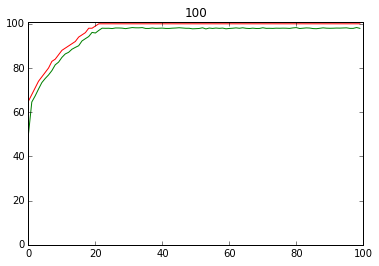

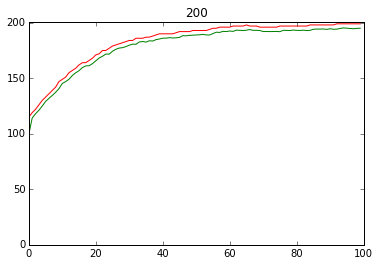

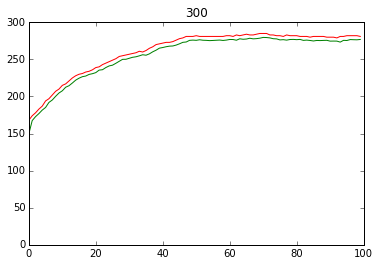

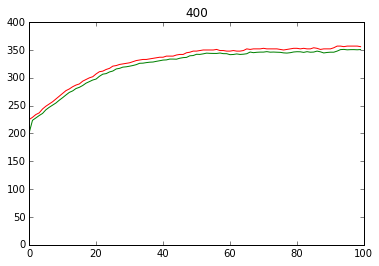

In [81]:
popSize=100
generations=100
mutationRate=0.02

genomes=[100,200,300,400]
for i in genomes: 
    dfitness = plotfitness(i,popSize,generations,mutationRate)
    figure()
    title(str(i))
    plot(dfitness[0], 'r') #max fitness
    plot(dfitness[1], 'g') #mean fitness
    ymax = i + 1
    ylim(0,ymax)